# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Question 1

**Explain how you solve the model**

In [13]:
def utility(z, eta):
    u = (z**(1+eta))/(1+eta)
    return u

def exp_utility(q, x, y, p):
    
    z1 = y-x+q-p*q
    z2 = y-p*q
    return p*utility(z1, eta) + (1-p)*utility(z2, eta)

In [14]:
x = 0.6
y = 1
p = 0.2
eta = -2

def q_optimize(x, y, p):
    obj = lambda q: -exp_utility(q, x, y, p)
    res = optimize.minimize_scalar(obj, bounds=(0, 1), method='bounded')
    return res.x
    
# grid for xs
xs = np.linspace(0.01, 0.9, 100)

# grid for qstar
qstar = np.zeros(100)

# loop
for i, x in enumerate(xs):
    qstar[i] = q_optimize(x, y, p)

Text(0.5, 1.0, 'Optimal insurance coverage, $q^*$')

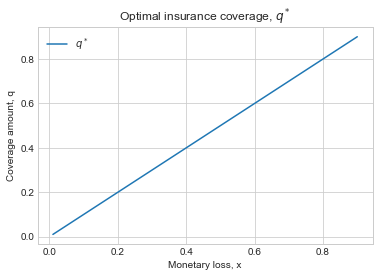

In [15]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(xs, qstar,'-', label='$q^*$')
ax.legend(loc='upper left')
ax.set_xlabel('Monetary loss, x')
ax.set_ylabel('Coverage amount, q')
ax.set_title('Optimal insurance coverage, $q^*$')

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.